In [4]:
import pandas as pd

# Subject 0

In [128]:
subject0_Imagery_hands = pd.read_csv("/content/subject0_Imagery_hands.csv")
subject0_Imagery_tongues = pd.read_csv("/content/subject0_Imagery_tongues.csv")
subject0_Real_hands = pd.read_csv("/content/subject0_Real_hands.csv")
subject0_Real_tongues = pd.read_csv("/content/subject0_Real_tongues.csv")

## Makes data in real and imagery forms

In [129]:
Imagery_frames = [subject0_Imagery_hands, subject0_Imagery_tongues]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [130]:
Real_frames = [subject0_Real_hands, subject0_Real_tongues]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [131]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,0.319480,0.000293,0
1,0,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,0.340468,0.000420,0
2,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,0.353153,0.000260,0
3,0,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,0.306466,0.000090,0
4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,0.312094,0.000258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2755,45,1025.123522,0.079350,71.822657,0.005559,7.213176,0.000558,1.372350,0.000106,0.284276,0.000022,1
2756,45,1348.359458,0.149950,66.411932,0.007386,8.201165,0.000912,1.509035,0.000168,0.371192,0.000041,1
2757,45,1291.338752,0.128585,81.084990,0.008074,6.594006,0.000657,1.430860,0.000142,0.309141,0.000031,1
2758,45,602.142338,0.076327,66.250427,0.008398,7.153753,0.000907,1.359199,0.000172,0.314774,0.000040,1


In [132]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [133]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_execution'],
      dtype='object')

In [134]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

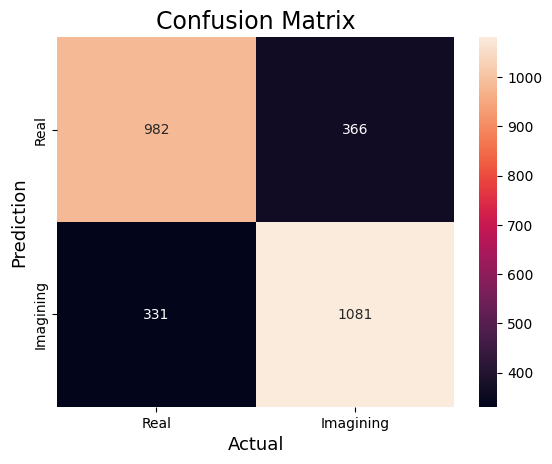

In [139]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [140]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.7474637681159421


### Random Forest

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-142-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [143]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

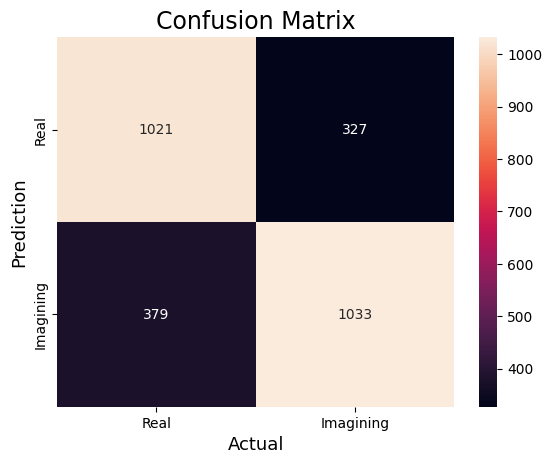

In [144]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [145]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.7442028985507246


## Makes data in hands and tongues forms

In [146]:
hand_frames = [subject0_Imagery_hands, subject0_Real_hands]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [147]:
tongues_frames = [subject0_Imagery_tongues, subject0_Real_tongues]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [148]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,0.319480,0.000293,0
1,0,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,0.340468,0.000420,0
2,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,0.353153,0.000260,0
3,0,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,0.306466,0.000090,0
4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,0.312094,0.000258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2755,45,1025.123522,0.079350,71.822657,0.005559,7.213176,0.000558,1.372350,0.000106,0.284276,0.000022,1
2756,45,1348.359458,0.149950,66.411932,0.007386,8.201165,0.000912,1.509035,0.000168,0.371192,0.000041,1
2757,45,1291.338752,0.128585,81.084990,0.008074,6.594006,0.000657,1.430860,0.000142,0.309141,0.000031,1
2758,45,602.142338,0.076327,66.250427,0.008398,7.153753,0.000907,1.359199,0.000172,0.314774,0.000040,1


In [149]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [150]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_tongue'],
      dtype='object')

In [151]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

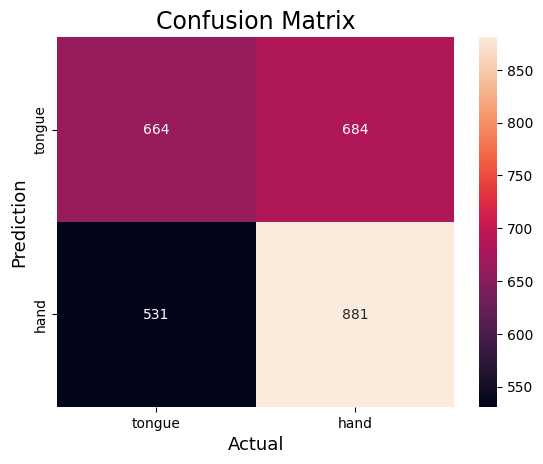

In [156]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [157]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.5597826086956522


### Random Forest

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-159-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

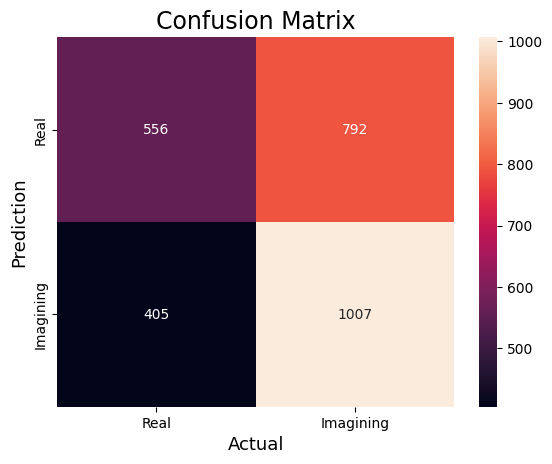

In [161]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [162]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.566304347826087


# Subject 2

In [163]:
subject2_Imagery_hands = pd.read_csv("/content/subject2_Imagery_hands.csv")
subject2_Imagery_tongues = pd.read_csv("/content/subject2_Imagery_tongues.csv")
subject2_Real_hands = pd.read_csv("/content/subject2_Real_hands.csv")
subject2_Real_tongues = pd.read_csv("/content/subject2_Real_tongues.csv")

## Makes data in real and imagery forms

In [164]:
Imagery_frames = [subject2_Imagery_hands, subject2_Imagery_tongues]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [165]:
Real_frames = [subject2_Real_hands, subject2_Real_tongues]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [166]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,182.664252,0.025179,32.458843,0.004474,5.742851,0.000792,1.412456,0.000195,0.319182,0.000044,0
1,0,80.044354,0.012035,35.013405,0.005265,4.645054,0.000698,1.249157,0.000188,0.276324,0.000042,0
2,0,177.213651,0.037405,31.037560,0.006551,4.401069,0.000929,1.217149,0.000257,0.360821,0.000076,0
3,0,169.611159,0.029587,33.261074,0.005802,4.380996,0.000764,1.100754,0.000192,0.382880,0.000067,0
4,0,402.274409,0.016761,37.848761,0.001577,5.906509,0.000246,1.176297,0.000049,0.366297,0.000015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,47,176.450452,0.029799,33.216046,0.005610,6.530403,0.001103,1.000416,0.000169,0.224647,0.000038,1
2876,47,191.219588,0.029378,47.845522,0.007351,8.047811,0.001236,1.148427,0.000176,0.247321,0.000038,1
2877,47,185.742916,0.027688,52.539384,0.007832,5.794241,0.000864,0.858207,0.000128,0.185568,0.000028,1
2878,47,91.805034,0.023122,36.576291,0.009212,8.641063,0.002176,1.178701,0.000297,0.178973,0.000045,1


In [167]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [168]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_execution'],
      dtype='object')

In [169]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

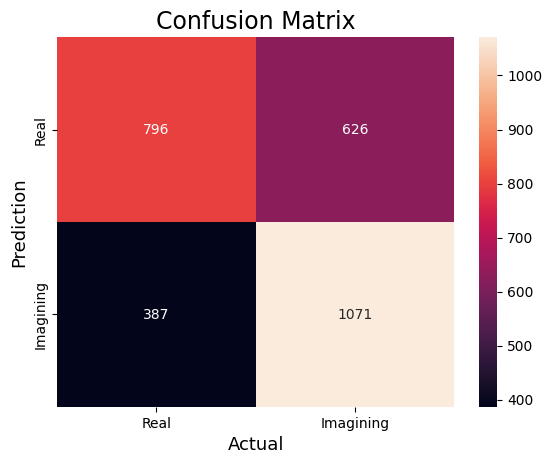

In [174]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [175]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.6482638888888889


### Random Forest

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-177-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [178]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

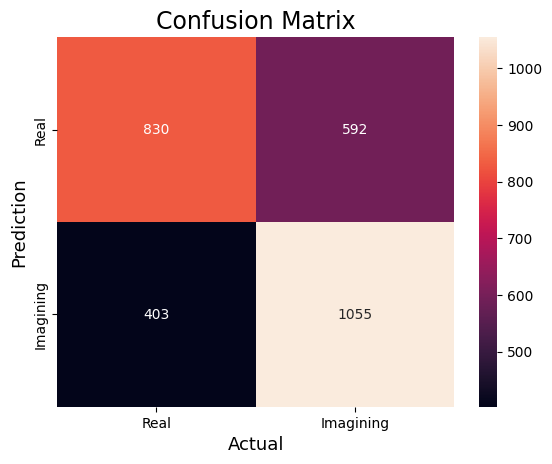

In [179]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [180]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.6545138888888888


## Makes data in hands and tongues forms

In [181]:
hand_frames = [subject2_Imagery_hands, subject2_Real_hands]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [182]:
tongues_frames = [subject2_Imagery_tongues, subject2_Real_tongues]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [183]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,182.664252,0.025179,32.458843,0.004474,5.742851,0.000792,1.412456,0.000195,0.319182,0.000044,0
1,0,80.044354,0.012035,35.013405,0.005265,4.645054,0.000698,1.249157,0.000188,0.276324,0.000042,0
2,0,177.213651,0.037405,31.037560,0.006551,4.401069,0.000929,1.217149,0.000257,0.360821,0.000076,0
3,0,169.611159,0.029587,33.261074,0.005802,4.380996,0.000764,1.100754,0.000192,0.382880,0.000067,0
4,0,402.274409,0.016761,37.848761,0.001577,5.906509,0.000246,1.176297,0.000049,0.366297,0.000015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,47,176.450452,0.029799,33.216046,0.005610,6.530403,0.001103,1.000416,0.000169,0.224647,0.000038,1
2876,47,191.219588,0.029378,47.845522,0.007351,8.047811,0.001236,1.148427,0.000176,0.247321,0.000038,1
2877,47,185.742916,0.027688,52.539384,0.007832,5.794241,0.000864,0.858207,0.000128,0.185568,0.000028,1
2878,47,91.805034,0.023122,36.576291,0.009212,8.641063,0.002176,1.178701,0.000297,0.178973,0.000045,1


In [184]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [185]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_tongue'],
      dtype='object')

In [186]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

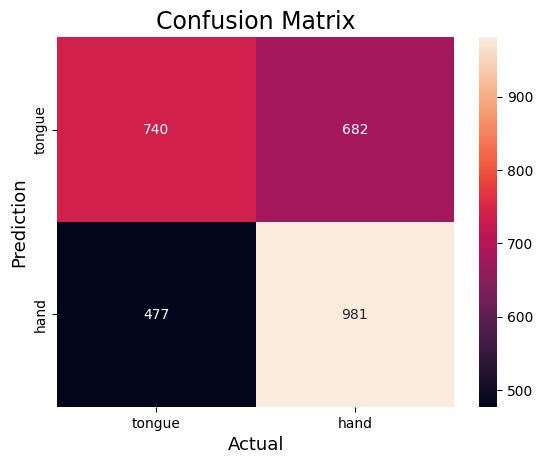

In [191]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [192]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.5975694444444445


### Random Forest

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [194]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-194-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [195]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

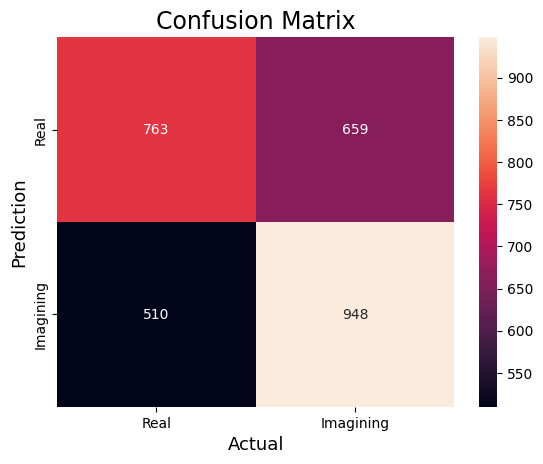

In [196]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [197]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.5940972222222223


# Subject 3

In [198]:
subject3_Imagery_hands = pd.read_csv("/content/subject3_Imagery_hands.csv")
subject3_Imagery_tongues = pd.read_csv("/content/subject3_Imagery_tongues.csv")
subject3_Real_hands = pd.read_csv("/content/subject3_Real_hands.csv")
subject3_Real_tongues = pd.read_csv("/content/subject3_Real_tongues.csv")

## Makes data in real and imagery forms

In [199]:
Imagery_frames = [subject3_Imagery_hands, subject3_Imagery_tongues]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [200]:
Real_frames = [subject3_Real_hands, subject3_Real_tongues]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [201]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,347.087532,0.026498,88.181142,0.006732,23.721132,0.001811,14.957072,0.001142,6.088257,0.000465,0
1,0,392.188825,0.054536,68.541574,0.009531,26.681865,0.003710,14.117104,0.001963,5.434006,0.000756,0
2,0,437.110223,0.024021,99.351257,0.005460,36.584412,0.002010,20.452602,0.001124,8.753868,0.000481,0
3,0,429.574084,0.035163,124.618792,0.010201,32.073645,0.002625,16.899517,0.001383,7.416021,0.000607,0
4,0,482.440331,0.026477,89.269562,0.004899,24.122166,0.001324,13.987356,0.000768,7.717746,0.000424,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,47,68.062074,0.009240,12.238398,0.001662,0.133618,0.000018,0.024617,0.000003,0.007784,0.000001,1
2876,47,61.005238,0.010171,6.415973,0.001070,0.179601,0.000030,0.024595,0.000004,0.007419,0.000001,1
2877,47,15.790666,0.007471,6.803984,0.003219,0.189721,0.000090,0.024814,0.000012,0.007043,0.000003,1
2878,47,23.212279,0.005419,5.596135,0.001306,0.149976,0.000035,0.027213,0.000006,0.007372,0.000002,1


In [202]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [203]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_execution'],
      dtype='object')

In [204]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [206]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [207]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [208]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

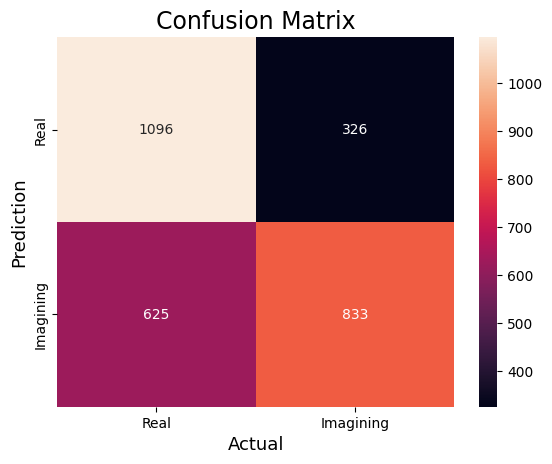

In [209]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [210]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.6697916666666667


### Random Forest

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [212]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-212-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

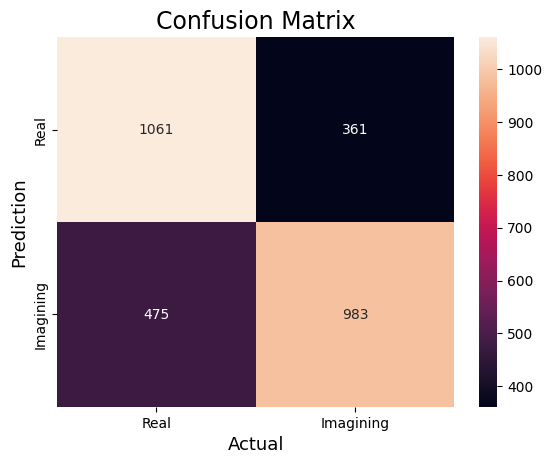

In [214]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [215]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.7097222222222223


## Makes data in hands and tongues forms

In [216]:
hand_frames = [subject3_Imagery_hands, subject3_Real_hands]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [217]:
tongues_frames = [subject3_Imagery_tongues, subject3_Real_tongues]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [218]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,347.087532,0.026498,88.181142,0.006732,23.721132,0.001811,14.957072,0.001142,6.088257,0.000465,0
1,0,392.188825,0.054536,68.541574,0.009531,26.681865,0.003710,14.117104,0.001963,5.434006,0.000756,0
2,0,437.110223,0.024021,99.351257,0.005460,36.584412,0.002010,20.452602,0.001124,8.753868,0.000481,0
3,0,429.574084,0.035163,124.618792,0.010201,32.073645,0.002625,16.899517,0.001383,7.416021,0.000607,0
4,0,482.440331,0.026477,89.269562,0.004899,24.122166,0.001324,13.987356,0.000768,7.717746,0.000424,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,47,68.062074,0.009240,12.238398,0.001662,0.133618,0.000018,0.024617,0.000003,0.007784,0.000001,1
2876,47,61.005238,0.010171,6.415973,0.001070,0.179601,0.000030,0.024595,0.000004,0.007419,0.000001,1
2877,47,15.790666,0.007471,6.803984,0.003219,0.189721,0.000090,0.024814,0.000012,0.007043,0.000003,1
2878,47,23.212279,0.005419,5.596135,0.001306,0.149976,0.000035,0.027213,0.000006,0.007372,0.000002,1


In [219]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [220]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_tongue'],
      dtype='object')

In [221]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [224]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

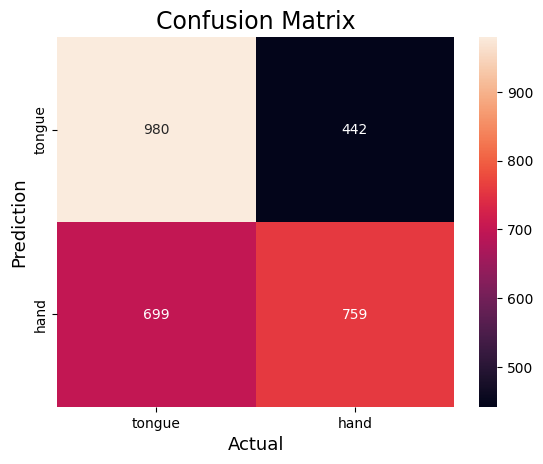

In [226]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [227]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.6038194444444445


### Random Forest

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [229]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-229-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [230]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

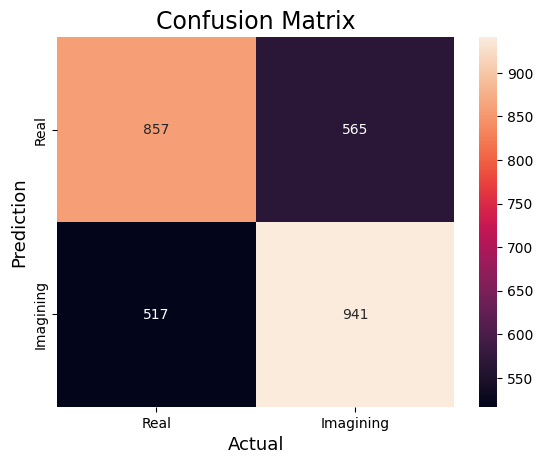

In [231]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [232]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.6243055555555556
